In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import tensorflow as tf
from sklearn.metrics import (
    roc_curve, auc, precision_recall_curve, roc_auc_score, average_precision_score,
    log_loss, accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import time
import os
import tempfile
import math
import random
from dataclasses import dataclass
from typing import Tuple, Dict
import ipaddress
from sklearn.preprocessing import LabelEncoder
import os

2025-08-30 09:33:29.675668: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-08-30 09:33:29.675730: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-08-30 09:33:29.676848: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-08-30 09:33:29.683469: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-08-30 09:33:30.416884: W tensorflow/compiler/tf2

In [2]:
file_path = "../dataset/UNSW/"

In [3]:
features = pd.read_csv(file_path + "NUSW-NB15_features.csv", encoding="cp1252")
features

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol
5,6,state,nominal,Indicates to the state and its dependent proto...
6,7,dur,Float,Record total duration
7,8,sbytes,Integer,Source to destination transaction bytes
8,9,dbytes,Integer,Destination to source transaction bytes
9,10,sttl,Integer,Source to destination time to live value


In [4]:
data1 = pd.read_csv(file_path + "UNSW-NB15_1.csv", encoding="cp1252", names=features.Name.unique())
data1.head()

/tmp/ipykernel_698183/1603248712.py:1: DtypeWarning: Columns (1,3,47) have mixed types. Specify dtype option on import or set low_memory=False.
  data1 = pd.read_csv(file_path + "UNSW-NB15_1.csv", encoding="cp1252", names=features.Name.unique())


,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,ï»¿59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0


In [5]:
data2 = pd.read_csv(file_path + "UNSW-NB15_2.csv", encoding="cp1252", names=features.Name.unique())
data2.head()

/tmp/ipykernel_698183/3954819474.py:1: DtypeWarning: Columns (3,39,47) have mixed types. Specify dtype option on import or set low_memory=False.
  data2 = pd.read_csv(file_path + "UNSW-NB15_2.csv", encoding="cp1252", names=features.Name.unique())


,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.0,6055,149.171.126.5,54145,tcp,FIN,0.072974,4238,60788,31,...,0,13,13,6,7,1,1,2,NaN,0
1,59.166.0.0,7832,149.171.126.3,5607,tcp,FIN,0.144951,5174,91072,31,...,0,13,13,6,7,1,1,2,NaN,0
2,59.166.0.8,11397,149.171.126.6,21,tcp,FIN,0.116107,2934,3742,31,...,1,1,2,7,5,1,1,4,NaN,0
3,59.166.0.0,3804,149.171.126.3,53,udp,CON,0.000986,146,178,31,...,0,13,13,6,7,1,1,2,NaN,0
4,59.166.0.8,14339,149.171.126.6,14724,tcp,FIN,0.038480,8928,320,31,...,0,8,20,7,5,1,1,4,NaN,0


In [6]:
data3 = pd.read_csv(file_path + "UNSW-NB15_3.csv", encoding="cp1252", names=features.Name.unique())
data3.head()

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.1,18247,149.171.126.4,7662,tcp,FIN,0.119596,4550,68342,31,...,,6,2,2,5,1,1,2,NaN,0
1,59.166.0.3,54771,149.171.126.2,27709,tcp,FIN,0.650574,8928,320,31,...,,3,5,2,4,1,1,4,NaN,0
2,59.166.0.8,13289,149.171.126.9,5190,tcp,FIN,0.007980,2158,2464,31,...,,3,5,1,1,1,1,3,NaN,0
3,149.171.126.18,1043,175.45.176.3,53,udp,INT,0.000005,264,0,60,...,,19,19,19,19,19,19,19,NaN,0
4,149.171.126.18,1043,175.45.176.3,53,udp,INT,0.000005,264,0,60,...,,19,19,19,19,19,19,19,NaN,0


In [7]:
data = pd.concat([data1, data2, data3], axis=0)

In [8]:
data = data.sample(100, random_state=42).iloc[:, 45:]

In [9]:
data.Label.unique()

array([0, 1])

In [10]:
data.Label.value_counts()

Label
0    82
1    18
Name: count, dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 175808 to 546311
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ct_dst_sport_ltm  100 non-null    int64 
 1   ct_dst_src_ltm    100 non-null    int64 
 2   attack_cat        18 non-null     object
 3   Label             100 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.9+ KB


In [12]:
data = data.select_dtypes(include=np.number)

In [13]:
# data = data.sample(1000, random_state=42)

In [14]:
data.Label.value_counts()

Label
0    82
1    18
Name: count, dtype: int64

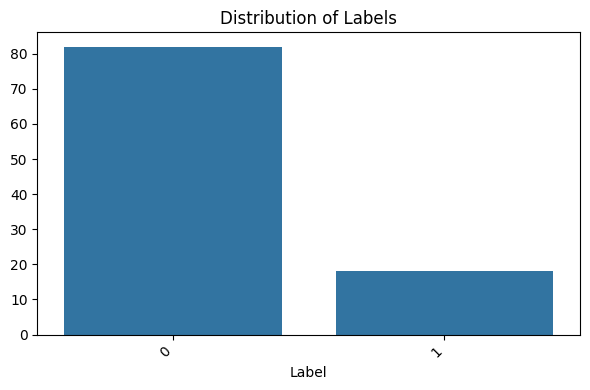

In [15]:
label_counts = data.Label.value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=label_counts.index, y=label_counts.values) 
plt.title("Distribution of Labels")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
# plt.savefig(results_dir + "label_distribution.png", dpi=400)
plt.show()

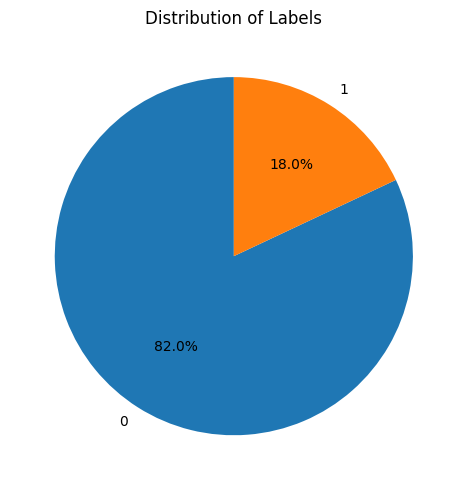

In [16]:
label_counts = data.Label.value_counts()

plt.figure(figsize=(6, 5))
plt.pie(label_counts.values, labels=label_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Labels")
plt.tight_layout()
# plt.savefig(results_dir + "label_distribution_pie.png", dpi=400)
plt.show()

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 175808 to 546311
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   ct_dst_sport_ltm  100 non-null    int64
 1   ct_dst_src_ltm    100 non-null    int64
 2   Label             100 non-null    int64
dtypes: int64(3)
memory usage: 3.1 KB


In [18]:
# data.proto.unique()

In [19]:
# data.service.unique()

In [20]:
# data["service"] = data["service"].fillna("unknown")
# encoder_service = LabelEncoder()
# data["service"] = encoder_tcp.fit_transform(data["service"])

In [21]:
# data.service.unique()

In [22]:
# data.state.unique()

In [23]:
# encoder_state = LabelEncoder()
# data["state"] = encoder_tcp.fit_transform(data["state"])

In [24]:
# data.ct_ftp_cmd.unique()

In [25]:
# data["ct_ftp_cmd"] = data["ct_ftp_cmd"].replace(" ", np.nan).fillna(-999)
# data["ct_ftp_cmd"] = data["ct_ftp_cmd"].replace('1',1)
# data["ct_ftp_cmd"] = data["ct_ftp_cmd"].replace('0', 0)

In [26]:
# data.ct_ftp_cmd.unique()

In [27]:
data.isnull().sum()

ct_dst_sport_ltm    0
ct_dst_src_ltm      0
Label               0
dtype: int64

In [28]:
# data["ct_flw_http_mthd"] = data["ct_flw_http_mthd"].fillna(data["ct_flw_http_mthd"].mean())
# data["is_ftp_login"] = data["is_ftp_login"].fillna(data["is_ftp_login"].mean())

In [29]:
data.isnull().sum()

ct_dst_sport_ltm    0
ct_dst_src_ltm      0
Label               0
dtype: int64

In [30]:
X = data.drop("Label", axis=1)
y = data["Label"]

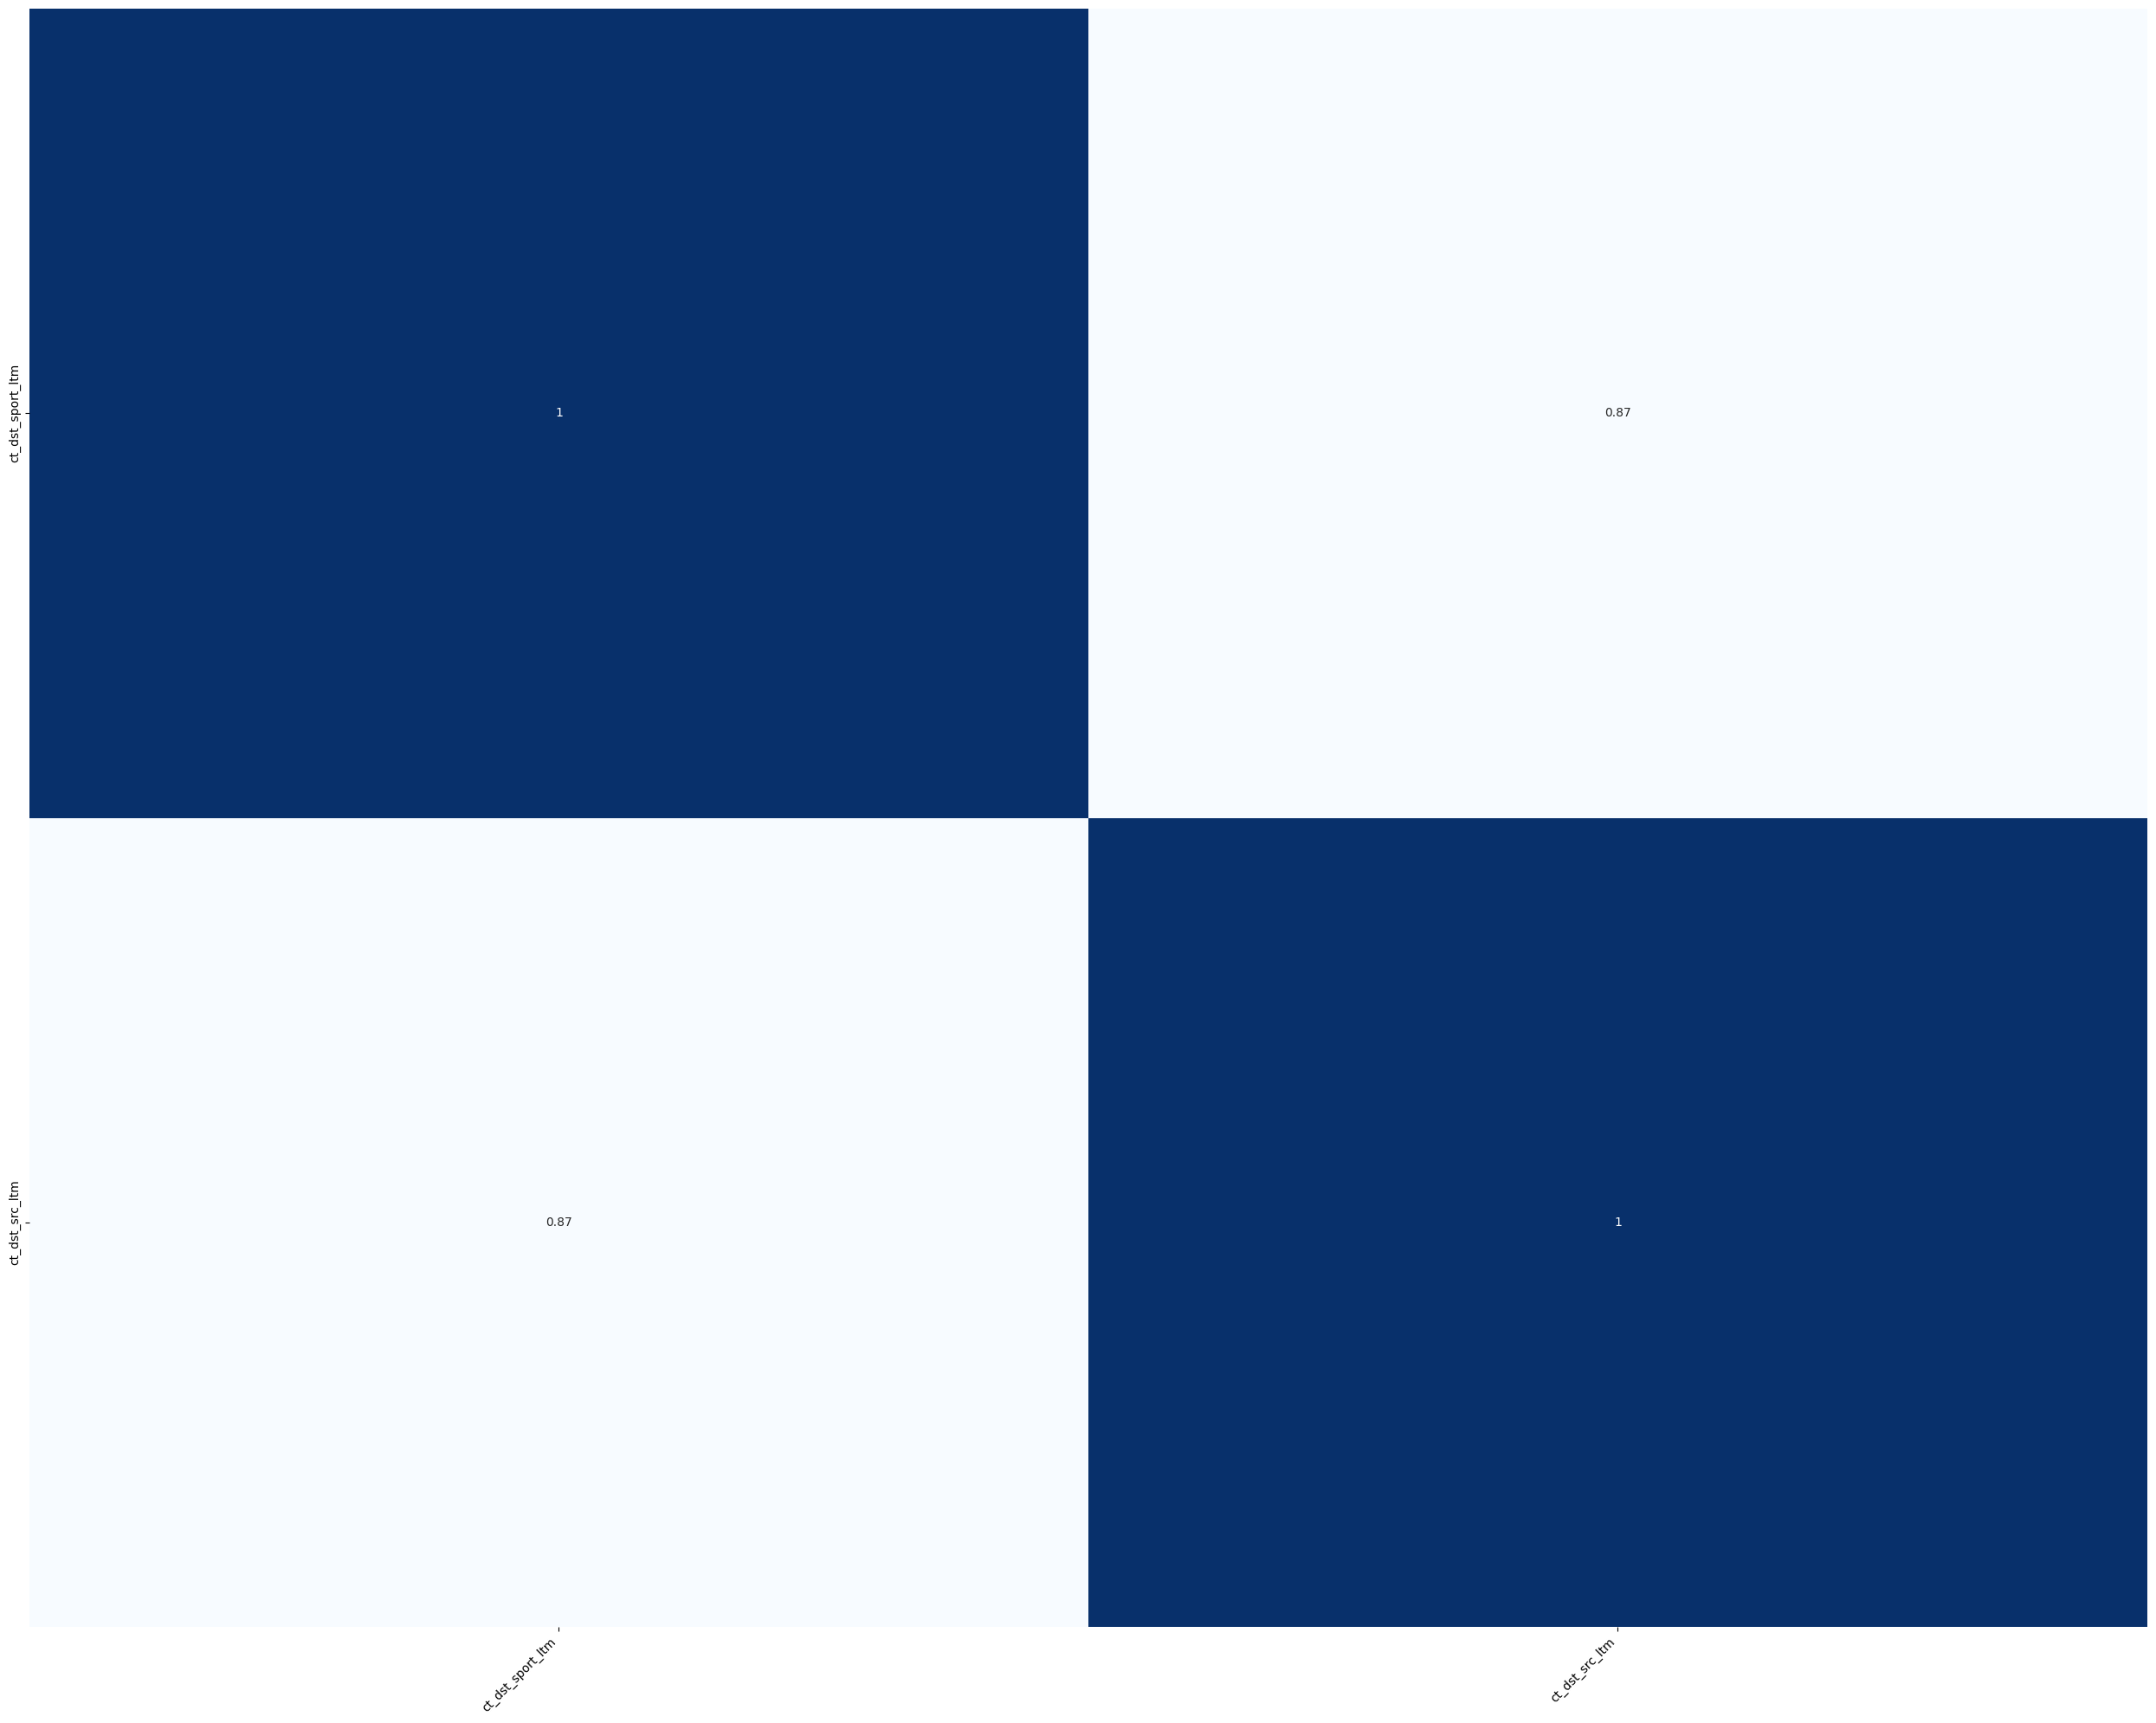

In [31]:
plt.figure(figsize=(25, 20))
sns.heatmap(X.corr(), annot=True, cbar=False, cmap="Blues")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
# plt.savefig(results_dir + "correlation_matrix.png", dpi=400)
plt.show()

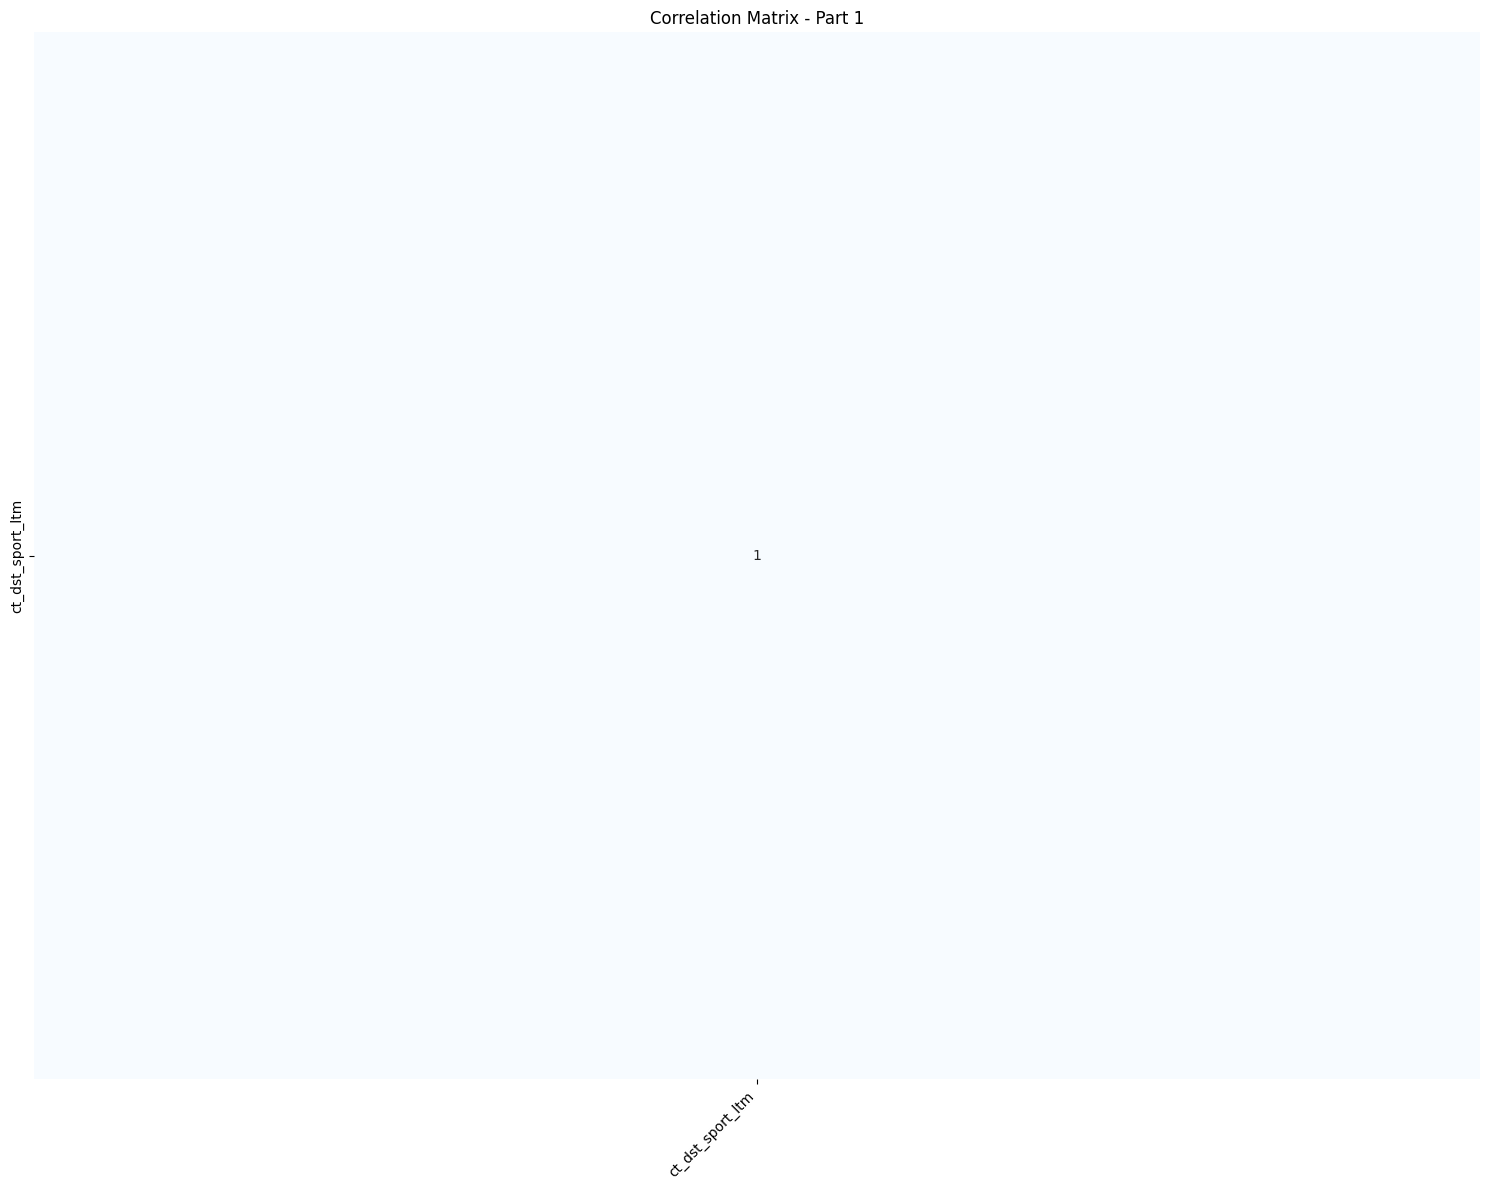

In [32]:
3# Split feature columns into two groups
half = len(X.columns) // 2
cols1 = X.columns[:half]
cols2 = X.columns[half:]

# First heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(X[cols1].corr(), annot=True, cbar=False, cmap="Blues")
plt.xticks(rotation=45, ha="right")
plt.title("Correlation Matrix - Part 1")
plt.tight_layout()
# plt.savefig(results_dir + "correlation_matrix_part1.png", dpi=400)
plt.show()


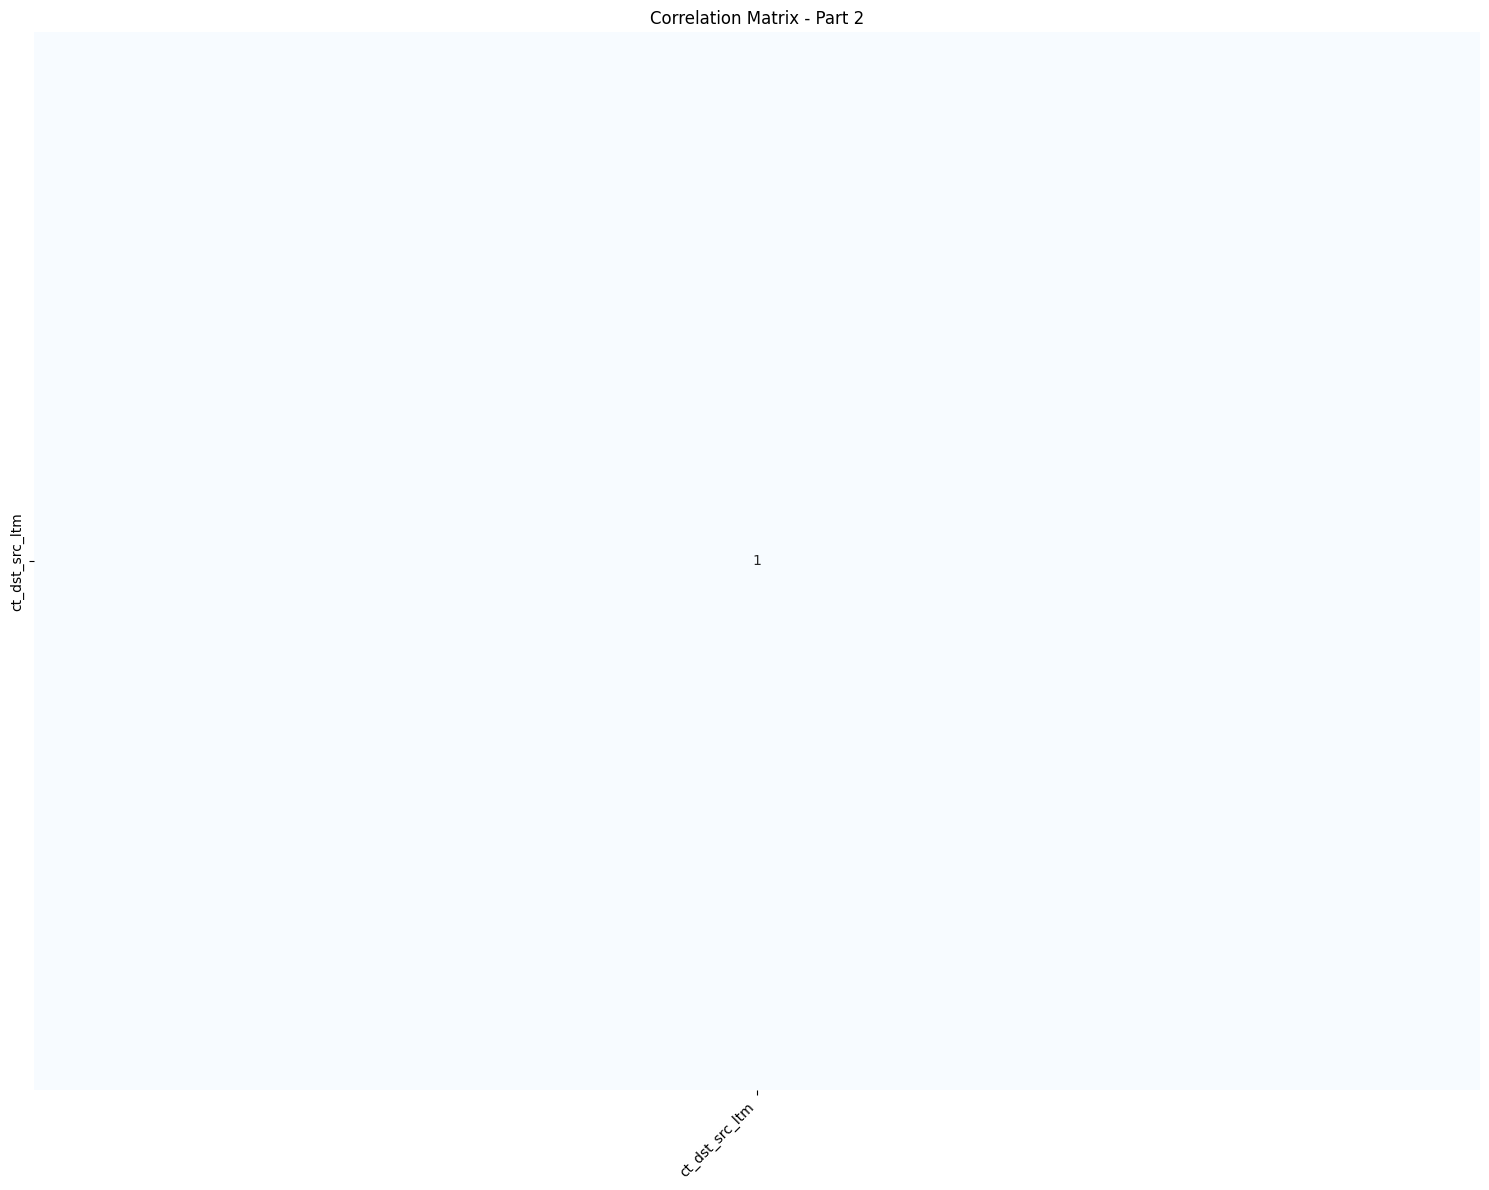

In [33]:
# Second heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(X[cols2].corr(), annot=True, cbar=False, cmap="Blues")
plt.xticks(rotation=45, ha="right")
plt.title("Correlation Matrix - Part 2")
plt.tight_layout()
# plt.savefig(results_dir + "correlation_matrix_part2.png", dpi=400)
plt.show()

In [34]:
del data, data1, data2, data3
gc.collect()

6002

In [35]:
### Helper function to evaluate each model on a fresh test set

def evaluate_on_test_data(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Classification report
    class_report = classification_report(y_test, y_pred, digits=4, target_names=["Attack", "Benign"])
    print("Classification Report\n")
    print(class_report)

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",
            xticklabels=["Predicted: Negative", "Predicted: Positive"],
            yticklabels=["Actual: Negative", "Actual: Positive"])

    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

    print(f"\nAccuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"F1-score: {f1_score(y_test, y_pred)}")

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.4, 
                                                    stratify=y, 
                                                    random_state=42)

In [37]:
X_train.shape, X_test.shape

((60, 2), (40, 2))

In [38]:
y_train.shape, y_test.shape

((60,), (40,))

In [39]:
results = {}

In [40]:
# Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)

## Cross Validation 

### 1. Hold-out Cross-validation (80% training data ) and (20%) testing data

In [41]:
X_train.shape, X_test.shape

((60, 2), (40, 2))

In [42]:
y_train.shape, y_test.shape

((60,), (40,))


Hold-out-Accuracy: 0.85
Hold-out-Recall: 0.2857142857142857
Hold-out-Precision: 0.6666666666666666
Hold-out-F1-score: 0.4
Classification Report

              precision    recall  f1-score   support

      Attack     0.8649    0.9697    0.9143        33
      Benign     0.6667    0.2857    0.4000         7

    accuracy                         0.8500        40
   macro avg     0.7658    0.6277    0.6571        40
weighted avg     0.8302    0.8500    0.8243        40



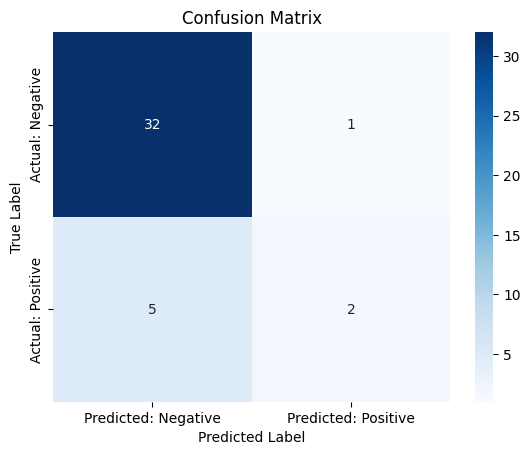


Accuracy: 0.85
Recall: 0.2857142857142857
Precision: 0.6666666666666666
F1-score: 0.4


In [43]:
### (0) Hold-out (single validation split)

model.fit(X_train, y_train)
y_val_hold_out = model.predict(X_test)

holdout_accuracy = accuracy_score(y_test, y_val_hold_out)

print(f"\nHold-out-Accuracy: {accuracy_score(y_test, y_val_hold_out)}")
print(f"Hold-out-Recall: {recall_score(y_test, y_val_hold_out)}")
print(f"Hold-out-Precision: {precision_score(y_test, y_val_hold_out)}")
print(f"Hold-out-F1-score: {f1_score(y_test, y_val_hold_out)}")


evaluate_on_test_data(model, X_train, y_train, X_test, y_test)

### K-Fold Cross Validation (Single Metrics)

In [44]:
from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_kfold = cross_val_score(model, X_train, y_train, cv=kfold, scoring="accuracy")
kfold_metrics = np.mean(cv_scores_kfold)
print(kfold_metrics)

0.8666666666666668


### KFold Cross Validation Multiple Metrics

In [45]:
from sklearn.model_selection import cross_validate

scoring = {"accuracy": "accuracy", 
           "precision": "precision", 
           "recall": "recall", 
           "f1": "f1"}

cv_results = cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
cv_results

/home/agbor/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'fit_time': array([0.00510335, 0.00480008, 0.0046103 , 0.00380015, 0.00278616]),
 'score_time': array([0.01050425, 0.01073766, 0.0087986 , 0.00867558, 0.0050571 ]),
 'test_accuracy': array([0.91666667, 0.83333333, 0.83333333, 1.        , 0.75      ]),
 'test_precision': array([0.66666667, 0.        , 1.        , 1.        , 0.        ]),
 'test_recall': array([1. , 0. , 0.5, 1. , 0. ]),
 'test_f1': array([0.8       , 0.        , 0.66666667, 1.        , 0.        ])}

In [46]:
print("Mean Accuracy:", cv_results["test_accuracy"].mean())
print("Mean Precision:", cv_results["test_precision"].mean())
print("Mean Recall:", cv_results["test_recall"].mean())
print("Mean F1:", cv_results["test_f1"].mean())
print("Mean Fit Time:", cv_results["fit_time"].mean())

Mean Accuracy: 0.8666666666666668
Mean Precision: 0.5333333333333333
Mean Recall: 0.5
Mean F1: 0.49333333333333335
Mean Fit Time: 0.004220008850097656


### Leave-One-Out-Cross Validation

In [47]:
### Due to large datasets, this implementation was commented out.

from sklearn.model_selection import LeaveOneOut

loocv = LeaveOneOut()
# cv_scores_loocv = cross_val_score(model, 
#                                   X_train, 
#                                   y_train, 
#                                   cv=loocv, 
#                                   scoring="accuracy",
#                                   )
# cv_scores_loocv

In [48]:
### Stratified K-Fold
from sklearn.model_selection import StratifiedKFold


skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
skfold_scores = cross_val_score(model, X_train, y_train, cv=skfold, scoring="accuracy")
print(skfold_scores)
print(skfold_scores.mean())

[0.91666667 0.91666667 0.91666667 0.75       0.83333333]
0.8666666666666666


In [49]:
skfold

StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

In [50]:
for fold, (train_idx, test_idx) in enumerate(skfold.split(X_train, y_train), 1):
    print(f"Fold {fold}")
    print("Train indices:", train_idx)
    print("Test indices:", test_idx)
    # print("y_test labels:", y[test_idx])
    print("-"*30)

Fold 1
Train indices: [ 0  4  5  6  7  9 10 11 12 13 14 15 16 18 19 22 24 25 28 29 30 31 32 33
 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 53 55 56 57 58 59]
Test indices: [ 1  2  3  8 17 20 21 23 26 27 52 54]
------------------------------
Fold 2
Train indices: [ 0  1  2  3  4  5  7  8  9 11 13 14 15 17 18 20 21 22 23 24 25 26 27 28
 29 31 33 36 37 39 40 41 42 43 45 46 48 49 50 51 52 53 54 55 56 57 58 59]
Test indices: [ 6 10 12 16 19 30 32 34 35 38 44 47]
------------------------------
Fold 3
Train indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 24 26
 27 28 29 30 32 33 34 35 38 39 40 43 44 45 47 48 49 50 51 52 54 55 56 57]
Test indices: [ 0 15 25 31 36 37 41 42 46 53 58 59]
------------------------------
Fold 4
Train indices: [ 0  1  2  3  4  6  7  8 10 11 12 13 15 16 17 19 20 21 22 23 24 25 26 27
 29 30 31 32 34 35 36 37 38 41 42 43 44 46 47 48 51 52 53 54 55 56 58 59]
Test indices: [ 5  9 14 18 28 33 39 40 45 49 50 57]
-----------------------

### LeavePOut

In [54]:
from sklearn.model_selection import LeavePOut

lpo = LeavePOut(p=3)
lpo_scores = cross_val_score(model, X_train, y_train, cv=lpo, scoring="accuracy")
lpo_scores

array([1.        , 0.66666667, 1.        , ..., 0.66666667, 0.66666667,
       0.33333333])

In [55]:
lpo_scores.mean()

0.8499512955386712

In [61]:
print("LeavePOut splits:", len(lpo_scores))

LeavePOut splits: 34220


### ShuffleSplit

In [66]:
from sklearn.model_selection import ShuffleSplit

ssplit = ShuffleSplit(n_splits=50, test_size=0.3, random_state=42)
ssplit_scores = cross_val_score(model, X_train, y_train, cv=ssplit, scoring="accuracy")
print("Average ShuffleSplit Scores: ", ssplit_scores.mean())

Average ShuffleSplit Scores:  0.8466666666666666


### StratifiedShuffleSplit

In [67]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=42)
scores = cross_val_score(model, X, y, cv=sss, scoring="accuracy")
print("StratifiedShuffleSplit scores:", scores)
print("Average StratifiedShuffleSplit scores:", scores.mean())

StratifiedShuffleSplit scores: [0.83333333 0.86666667 0.9        0.93333333 0.9       ]
Average StratifiedShuffleSplit scores: 0.8866666666666667


### RepeatedKFold

In [68]:
from sklearn.model_selection import RepeatedKFold

rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
scores = cross_val_score(model, X, y, cv=rkf, scoring="accuracy")
print("RepeatedKFold scores:", scores)
print("Mean RepeatedKFold scores:", scores.mean())

RepeatedKFold scores: [0.7  0.85 0.95 0.9  0.8  0.85 0.8  0.8  0.95 0.9  0.85 0.85 0.9  0.95
 0.7 ]
Mean RepeatedKFold scores: 0.8499999999999999


### RepeatedStratifiedKFold

In [69]:
from sklearn.model_selection import RepeatedStratifiedKFold

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
scores = cross_val_score(model, X, y, cv=rskf, scoring="accuracy")
print("RepeatedStratifiedKFold scores:", scores)
print("Mean RepeatedStratifiedKFold scores:", scores.mean())

RepeatedStratifiedKFold scores: [0.85 1.   0.9  0.75 0.75 0.9  0.85 0.75 1.   0.8  0.9  0.9  0.75 0.85
 0.9 ]
Mean RepeatedStratifiedKFold scores: 0.8566666666666668


### visualizing the Training Curves

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5, scoring="accuracy", n_jobs=-1
)

In [ ]:
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label="Training score")
plt.plot(train_sizes, test_scores_mean, label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.legend()
plt.show()